In [21]:
#support vector regressor

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [24]:
X

array([[-0.40254557, -0.45344666],
       [ 1.8058174 , -1.0119562 ],
       [ 0.57543219, -0.45982986],
       ...,
       [ 1.51314058, -1.19687479],
       [-0.77741792,  0.60637457],
       [ 1.07324307, -1.15867042]])

In [25]:
y

array([-6.10603863e+01,  6.12651401e+01,  5.98409428e+00, -1.91372286e+01,
       -3.25219206e+01,  1.04684079e+02,  4.53349192e+01,  1.27170242e+01,
       -1.10740660e+02,  1.79209919e+01, -1.15431494e+02,  1.14196484e+02,
        1.78831417e+01, -1.28633621e+02, -1.09312028e+02, -2.31472992e+02,
        4.22087589e+01, -3.73043814e+01,  8.30447132e+01, -7.19931918e+01,
        1.06060738e+02,  1.16913909e+02, -2.34071047e+01,  1.24125906e+02,
       -1.21219602e+01,  2.80612880e+01, -1.27588453e+02,  2.13939577e+02,
        2.38845644e+01,  4.04575942e+01, -7.90722768e+01,  2.12796574e+00,
       -1.12272454e+02,  1.29730279e+02,  1.18705112e+02,  9.78653612e+01,
       -1.32323288e+02, -7.87717071e+01, -1.10058047e+02, -1.56999976e+01,
        1.52296492e+01,  9.09103869e+01, -6.68132270e+01, -1.12572267e+01,
        4.44941353e+01,  1.04856056e+02,  8.89930990e+01, -2.38133959e+02,
       -4.58346776e+00, -1.52746393e+02, -4.30811450e+01, -8.64665083e+01,
       -3.51580867e+01, -

<Axes: xlabel='0', ylabel='1'>

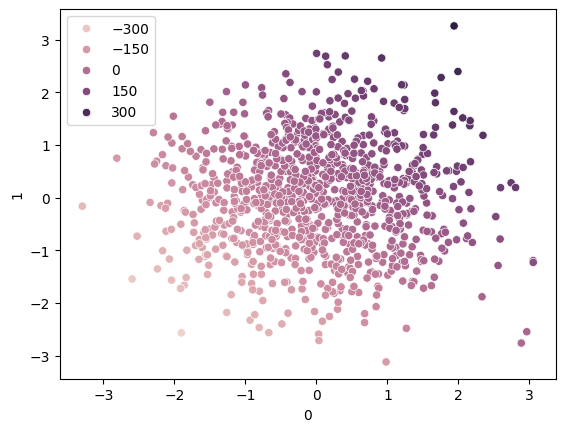

In [26]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [29]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [30]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [31]:
svr.coef_

array([[73.82446338, 74.33912925]])

In [32]:
y_pred = svr.predict(X_test)

In [33]:
y_pred

array([ -44.79871452,   17.37667663,   85.86217072,   31.80119384,
        118.01030713, -102.78397715,  106.12801481,  197.92952346,
        -10.7465972 , -155.01440195, -146.07636746,  -74.32657442,
        -93.50814585, -221.49793531, -162.35535333,  -23.20161848,
        -83.41621599,   45.007366  ,   26.99639344, -241.65871171,
        -60.3440515 ,   15.59028374,   61.51785018,  -22.74286372,
          9.1694971 ,  100.63658495,  -16.06983063,  143.06636374,
        -45.83950781,  134.68007827,   25.71075825,  -75.70671287,
        135.18925188,   35.79558984,   24.91138427,  -27.82320403,
          2.12504457,  124.64036397,   47.17318599,  143.45146305,
         76.74718321,   33.45114337, -143.40671679,   21.18352676,
        183.04454154,  -53.4128108 ,  230.45663009,   87.95298724,
         71.50470494,  -24.85592177,  -38.15087814,  123.41032459,
       -124.61482022,   98.50586169,  164.07377763,   -9.24371518,
        -30.75300846, -132.80302999, -247.99428776,  -44.77563

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9990731979494601

In [35]:
#hyperparamter tuning with svr

from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': ['linear'],
         'epsilon': [0.01, 0.1, 0.2, 0.3]}


grid = GridSearchCV(SVR(), param_grid=params, cv = 5, verbose = 3)

In [36]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.666 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.679 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.675 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.666 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.679 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.675 total time=   0.0s
[CV 1/5] END C=0.1, epsilon

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [37]:
grid.best_params_

{'C': 50, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'linear'}

In [38]:
grid.best_score_

0.9991952947587451

In [39]:
y_pred = grid.predict(X_test)

In [40]:
r2_score(y_test, y_pred)

0.9990635174654365